In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
#ЗАГРУЗКА ДАННЫХ И ПРЕДВАРИТЕЛЬНАЯ ОБРАТБОТКА
dataset = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv", sep=';').drop(["id"], axis=1)

Сводка по датасету
* **Возраст** | age | int (days)
* **Рост** | height | int (cm) |
* **Вес** | weight | float (kg) |
* **Пол** | gender | categorical code |
* **Систолическое артериальное давление** | ap_hi | int |
* **Диастолическое артериальное давление** | ap_lo | int |
* **Холестерин** | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* **Глюкоза** | gluc | 1: normal, 2: above normal, 3: well above normal |
* **Курение** | smoke | binary |
* **Употребление алкоголя** | alco | binary |
* **Физическая активность** | active | binary |
* **Наличие сердечно-сосудистого заболевания** | cardio | binary | - таргет предсказания

In [3]:
#ПОСМОТРИМ НА ПЕРВЫЕ ЗНАЧЕНИЯ
dataset.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#ВОЗРАСТА ПРЕДСТАВЛЕН В ДНЯХ ПЕРЕВЕДЕМ ЕГО В ГОДА
dataset['age'] = (dataset['age'] / 365).round().astype(np.int64)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
duplicate_count = dataset.duplicated().sum()
print(duplicate_count)
dataset = dataset.drop_duplicates()

3816


Количетсво дубликатов достаточно большое, удалим их.

In [7]:
dataset.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.00,66184.0,66184.00
mean,53.37,1.36,164.35,74.58,129.30,97.61,1.39,1.24,0.09,0.06,0.8,0.51
std,6.81,0.48,8.35,14.61,158.37,193.78,0.69,0.58,0.29,0.23,0.4,0.50
min,30.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.00
25%,48.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00
50%,54.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,1.00
75%,59.00,2.00,170.00,83.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.00
max,65.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.00


Как можно увидеть у нас 12 столбцов. 11 столбцов имеют тип данных int64, 1 столбец имеет тип данных float64.
Также в таблице отсутствуют нулевые значения. Размер датасета (70000, 12)

Теперь можно выделить типы признаков
* smoke, alco, active, cardio - являются бинарными признаками
* gender, cholesterol, gluc - являются категориальными признаками
* age,  height, weight, ap_hi, ap_lo - являются числовыми признаками

Теперь как мы определили категориальные признаки посмотрим их соотношения

Гендерное распределение:
gender
1    0.642769
2    0.357231
Name: proportion, dtype: float64

Распределение холестерина:
cholesterol
1    0.735102
2    0.143811
3    0.121087
Name: proportion, dtype: float64

Распределение глюкозы:
gluc
1    0.841714
3    0.079883
2    0.078403
Name: proportion, dtype: float64


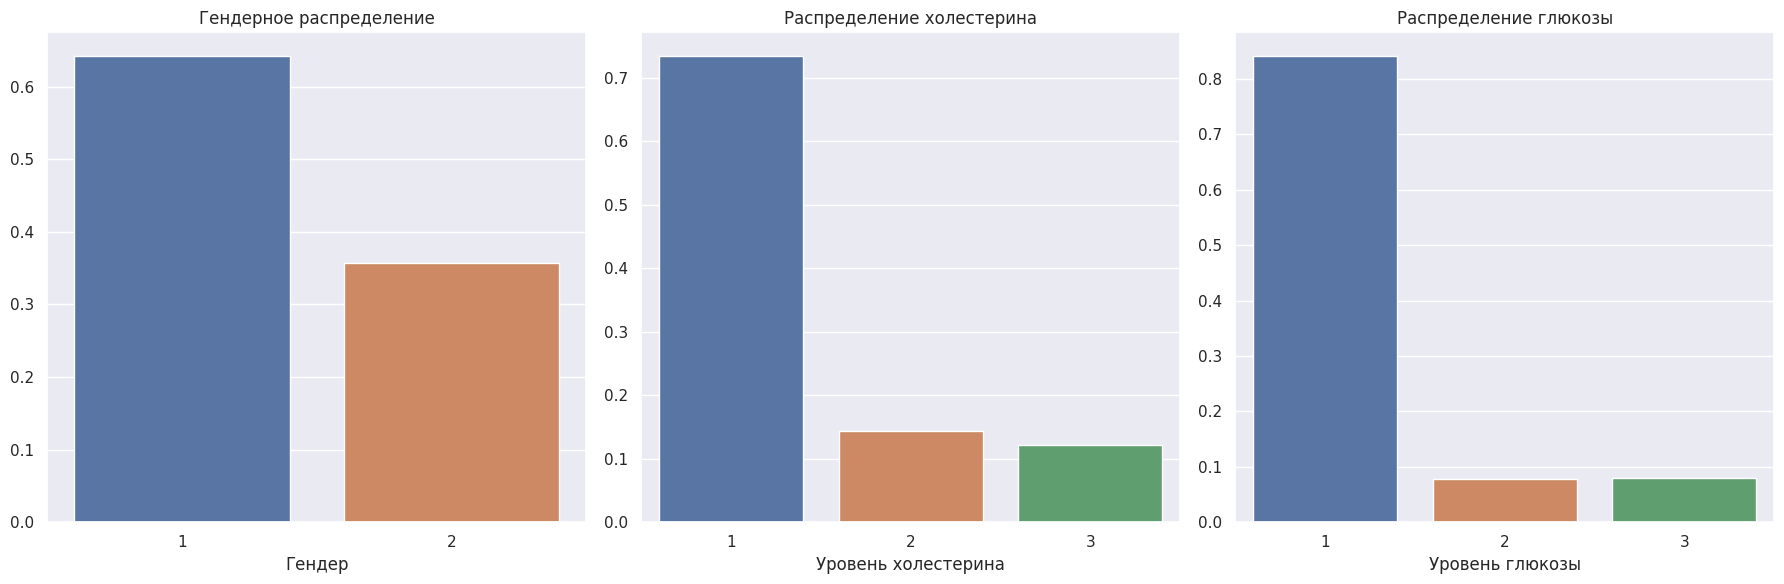

In [8]:
gender_counts = dataset["gender"].value_counts(normalize=True)
cholesterol_counts = dataset["cholesterol"].value_counts(normalize=True)
gluc_counts = dataset["gluc"].value_counts(normalize=True)

print("Гендерное распределение:")
print(gender_counts)

print("\nРаспределение холестерина:")
print(cholesterol_counts)

print("\nРаспределение глюкозы:")
print(gluc_counts)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Гендерное распределение')
plt.xlabel('Гендер')


plt.subplot(1, 3, 2)
sns.barplot(x=cholesterol_counts.index, y=cholesterol_counts.values)
plt.title('Распределение холестерина')
plt.xlabel('Уровень холестерина')

plt.subplot(1, 3, 3)
sns.barplot(x=gluc_counts.index, y=gluc_counts.values)
plt.title('Распределение глюкозы')
plt.xlabel('Уровень глюкозы')

plt.tight_layout()
plt.show()

Можно сказать, что в данных наблюдается явное несоответствие в распределении классов по признакам гендера, уровня холестерина и глюкозы. Если дисбаланс в показателях холестерина и глюкозы ещё можно объяснить, поскольку они напрямую связаны с риском сердечно-сосудистых заболеваний, то распределение по признаку гендера вызывает вопросы.

Теперь перейдем к росту и весу.

Предполагается, что рост имеет нормальное распередение, попробуем потдвердить или опровергнуть это, также проверим это и для веса.

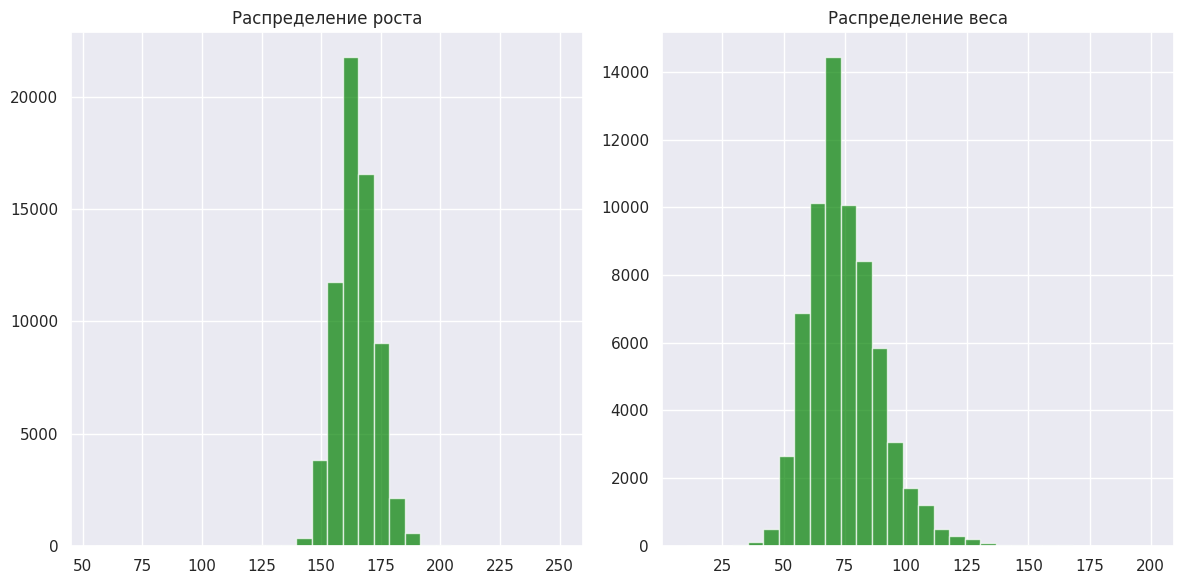

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataset['height'], bins=30, color='green', alpha=0.7)
plt.title('Распределение роста')

plt.subplot(1, 2, 2)
plt.hist(dataset['weight'], bins=30, color='green', alpha=0.7)
plt.title('Распределение веса')
plt.tight_layout()  
plt.show()

Получилось, что-то похожее на нормальное распределение как для роста, так и для веса. 

Давайте посмотрим на количество выбросов.

Выбросы для роста:  518
Выбросы для веса:  1282


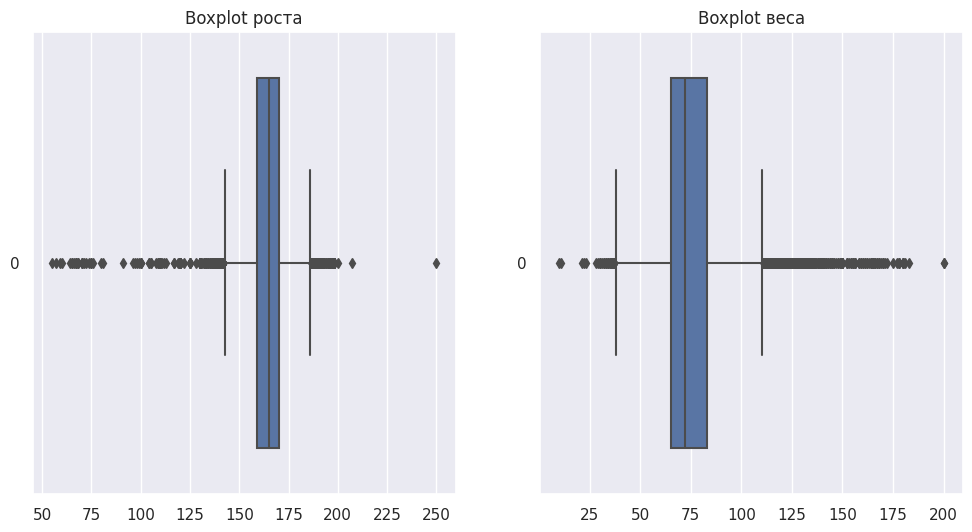

In [10]:
Q1 = dataset['height'].quantile(0.25)
Q3 = dataset['height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['height'] < lower_bound) | (dataset['height'] > upper_bound)]
print("Выбросы для роста: ", len(outliers))

Q1 = dataset['weight'].quantile(0.25)
Q3 = dataset['weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['weight'] < lower_bound) | (dataset['weight'] > upper_bound)]
print("Выбросы для веса: ", len(outliers))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(dataset['height'], orient='h')
plt.title('Boxplot роста')

plt.subplot(1, 2, 2)
sns.boxplot(dataset['weight'], orient='h')
plt.title('Boxplot веса')
plt.show()

Мы можем заметить, что в данных по признаку веса присутствует большое количество выбросов, и большинство из них превышают 100 кг. Это вполне может соответствовать действительности, поскольку повышенный уровень холестерина часто связан с ожирением, а наши данные касаются сердечно-сосудистых заболеваний. Однако есть точки, где вес ниже 35 кг, и такие значения, скорее всего, являются ошибочными, поэтому их необходимо удалить.

А в росте ситация противоположная, людей ниже 130см мне кажется очень мало и это больше похоже на ошибки, либо в исследовании принимали участие гномики) Также важно заметить, что это точно не дети, так как в описани датасета, который мы вывели выше минимальный возраст равен 30.

Как итог надо для отчистить датасет от выбросов, надо удалить точки, где рост <130 и > 210, а также удалить точки для признака веса, где вес < 35кг.

Продолжим выявление ошибок в данных, теперь рассмотрим систолическое и диастолическое давление. Известно, что систолическое давление всегда должно быть выше диастолического, поэтому если в датасете встречаются случаи, где диастолическое давление превышает систолическое, это следует считать ошибкой. Для начала необходимо подсчитать количество таких аномалий.

Кроме того, считаю важным удалить данные, где значения давления отрицательные, так как это явно ошибочные данные. Также необходимо установить логичные границы для нормальных значений давления. Например, для систолического давления возьмем диапазон от 90 до 220 мм рт. ст., а для диастолического — от 60 до 140 мм рт. ст. Всё, что выходит за эти пределы, также должно быть удалено как выбросы.

In [11]:
count_wrong = len(dataset[(dataset['ap_lo'] < dataset['ap_hi']) & 
                  (dataset['ap_lo'] >= 60) & (dataset['ap_hi'] >= 90) & 
                  (dataset['ap_lo'] <= 140) & (dataset['ap_hi'] <= 220)])
print(count_wrong)
dataset = dataset[(dataset['ap_lo'] < dataset['ap_hi']) & 
                  (dataset['ap_lo'] >= 60) & (dataset['ap_hi'] >= 90) & 
                  (dataset['ap_lo'] <= 140) & (dataset['ap_hi'] <= 220)]

64667


Предположение, что в старости сердечно-сосудистые заболевания встречаются чаще, чем в молодости, давайте это проверим. Выведем количество больных и здоровых по возрастам.

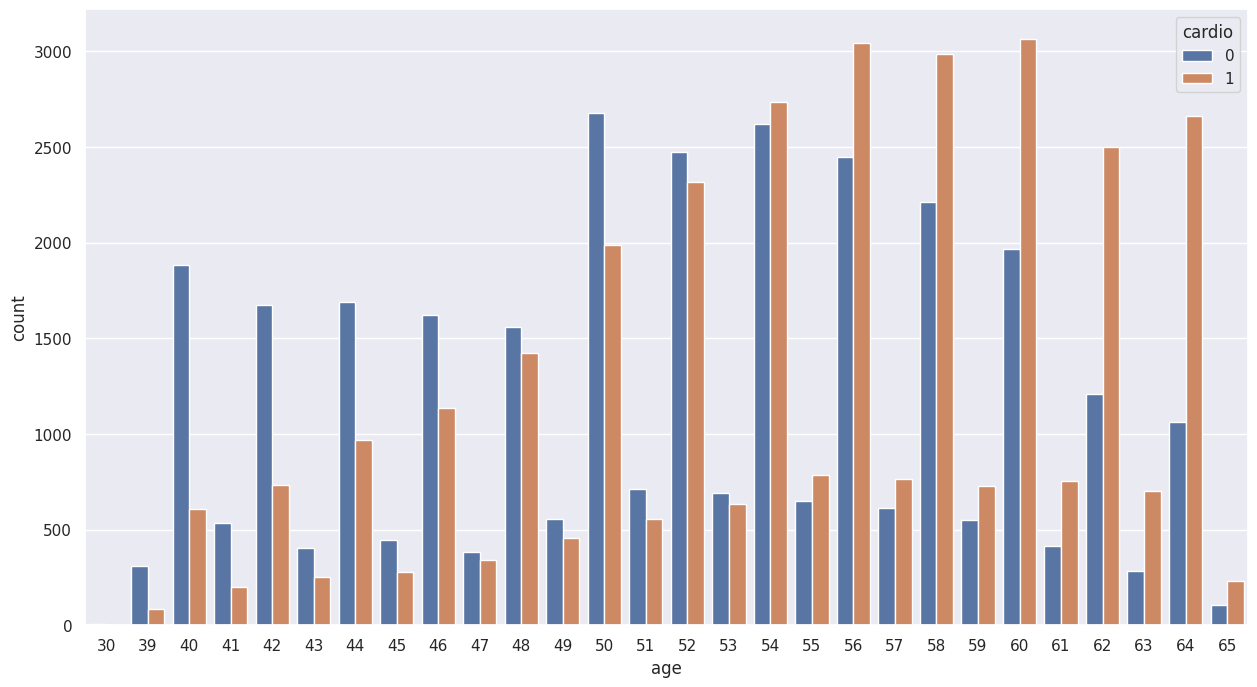

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(x='age', hue='cardio', data=dataset)
plt.show()

Предположение оказалось правдивым, также важно заметить, что начиная с восзраста в 55 лет количество больных становится больше, чем здоровых. Таким образом мы выявили, что признак прямо age влияет на появлени ссз.

В признаке гендер непонятно, кто мужчина, а кто женщина, было бы полезно это узнать. За основу возьмем, что статистически женщины ниже мужчин.

In [13]:
#ПЕРЕД ЭТИМ НУЖНО УДАЛИТЬ ОШИБКИ
dataset = dataset[(dataset['height'] >= 130) & (dataset['height'] <= 210)]
dataset = dataset[(dataset['weight'] > 35)]

In [14]:
dataset.pivot_table(values=['height'], index=['gender'], aggfunc='mean')

,height
gender,
1,161.305957
2,170.088848


Теперь будем исходить, что gender = 2 - это мужчины, но давайте попробуем собрать ещё доказательства в пользу этого.

Есть несколько предположений: 1-мужчины чаще употребляют алгоколь, 2-мужчины чаще курят

In [15]:
smokers = dataset[dataset['smoke'] == 1]
print(smokers.pivot_table(values=['smoke'], index=['gender'], aggfunc='count'))
print("---------------")
alco = dataset[dataset['alco'] == 1]
print(alco.pivot_table(values=['alco'], index=['gender'], aggfunc='count'))

        smoke
gender       
1         791
2        5193
---------------
        alco
gender      
1       1120
2       2521


Предположения потдвердились, мужчины чаще курят и пьют

Создание признака индекса массы тела, он нужен для того, чтобы понимать является ли масса недостаточной, нормальной или избыточной, также он объединяет данные признака роста и веса в одно целое.

In [16]:
dataset['height'] = dataset['height'] / 100
insert_position = len(dataset.columns) - 1

dataset.insert(insert_position, 'BMI', dataset['weight'] / (dataset['height'] ** 2))

In [17]:
dataset.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
count,64560.00,64560.00,64560.00,64560.00,64560.00,64560.00,64560.00,64560.00,64560.00,64560.00,64560.0,64560.00,64560.00
mean,53.36,1.36,1.64,74.52,127.10,81.47,1.38,1.24,0.09,0.06,0.8,27.60,0.51
std,6.81,0.48,0.08,14.49,16.89,9.53,0.69,0.58,0.29,0.23,0.4,5.28,0.50
min,30.00,1.00,1.30,35.45,90.00,60.00,1.00,1.00,0.00,0.00,0.0,13.52,0.00
25%,48.00,1.00,1.59,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,23.88,0.00
50%,54.00,1.00,1.65,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,26.57,1.00
75%,59.00,2.00,1.70,83.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,30.46,1.00
max,65.00,2.00,2.07,200.00,220.00,140.00,3.00,3.00,1.00,1.00,1.0,85.78,1.00


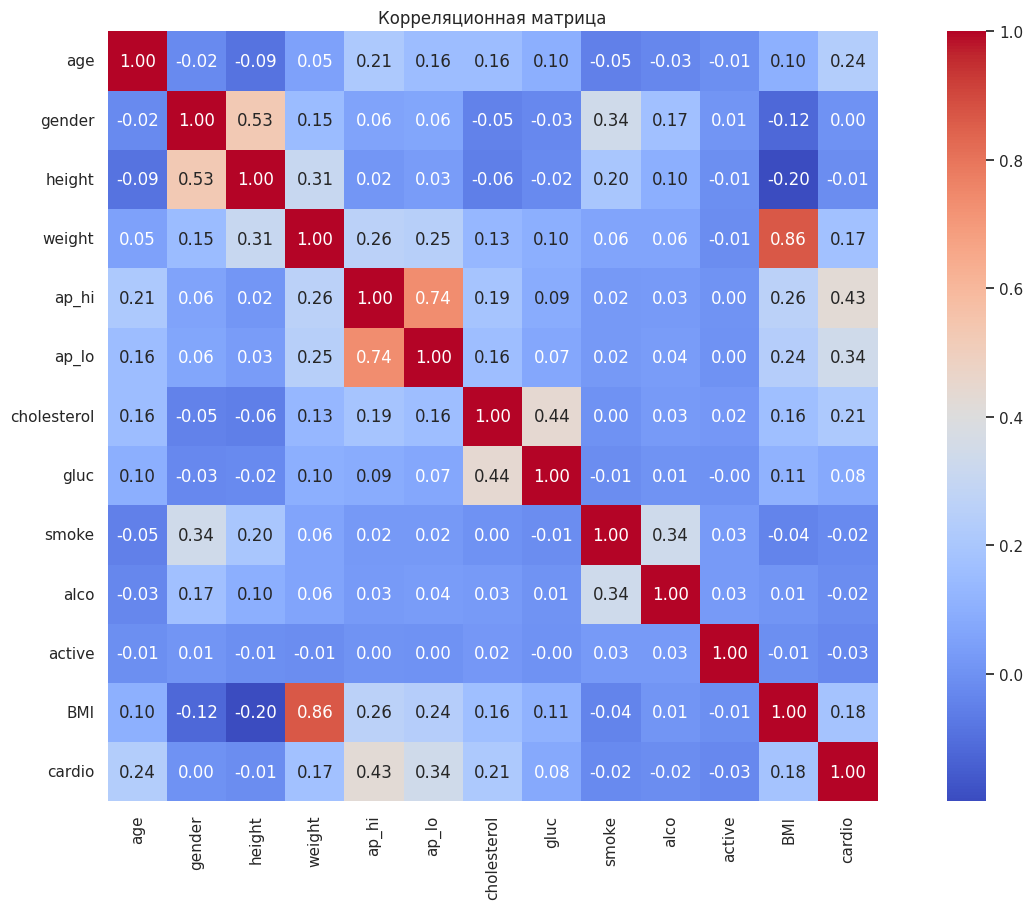

In [18]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица')
plt.show()

Из матрицы можно понять, как таргет cardio зависит от других признаков

У кардио есть положительная зависимость с признаками: age, ap_hi, ap_lo, cholesterol, gluc, BMI

С остальными пирзнаками она практически отсутствует.

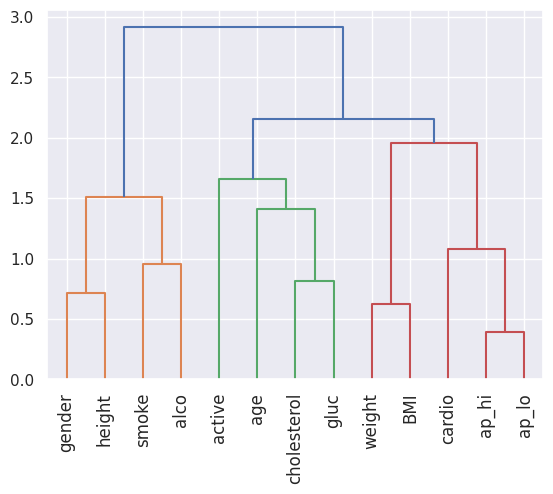

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(correlation_matrix, 'ward')
dendrogram(Z, labels=dataset.columns)  

plt.xticks(rotation=90)  
plt.show()

Дендограмма подтверждает результаты матрицы. Как мы видим курение и утпотребление алгоколя оказывают слабое влияние на таргет cardio, хотя казалось, что употребдение алкоголя и курения повышают риск получения ссз, также практически никого влияния не оказывает активность. А вот уровень холестерина вызывает ссз, также хоть и для таргета cardio уровень глюкозы не так сильно влияет, но с признаком холестерина уровень глюкозы имеет положительную зависимость.

Давайте попробуем предсказать таргет основываясь только на признаках, которые имеют зависимость с таргетом. Воспользуемся МНК для оценки параметров линейной регрессии.

Точность (Accuracy): 0.6950123915737298
TP: 5515
TN: 3459
FP: 2858
FN: 1080
F1-Score: 0.7369053981827901


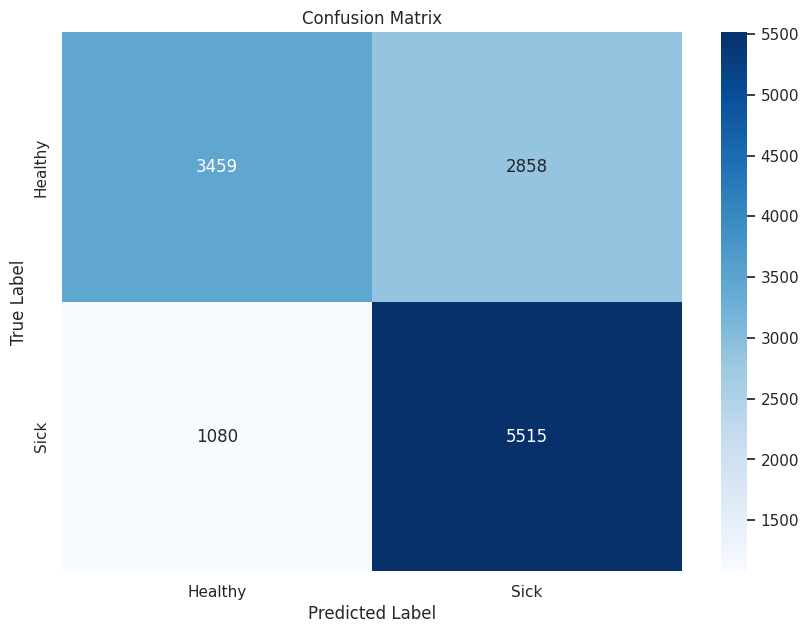

In [22]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = dataset[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'BMI']].values  
y = dataset['cardio'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)


y_pred = X_test_b.dot(theta_best)
y_pred_class = (y_pred > 0.40).astype(int)

accuracy = np.mean(y_test == y_pred_class)
print(f"Точность (Accuracy): {accuracy}")


cm = confusion_matrix(y_test, y_pred_class)
TN, FP, FN, TP = cm.ravel()
print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1}")
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Sick'], yticklabels=['Healthy', 'Sick'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Мы получили итоговое значение по F1-мере: 0.736, что является хорошим показателем. Также я изменил пороговое значения для определения больного с 0.5 на 0.4, сделано это для того, чтобы минимизировать FN, так как лучше предсказать, что человек болен, когда он здоров, чем наоборот.